# Vectors and Matrices

If you are sitting in this class, you may have seen linear algebra—the mathematics of vectors, matrices, and their operations—before. But linear algebra is fundamental to a huge chunk of computational neuroscience, so we'll be taking the time to review some basic concepts.

You could take a whole quarter of linear algebra in the math department here; we won't be going into that much detail, or be getting as theoretical as a math course might. Instead, we will be approaching linear algebra from the perspective of neuroscience. Why are the tools of linear algebra so useful for us? What do all the topics you've previously learned about mean in neuroscientific terms? And how might you use linear algebra in your research?

:::{admonition} Learning Goals
:class: important
By the end of this week, you should be able to:
* Describe and identify scalars, vectors, and matrices
* Apply basic operations like the transpose, the dot product, and matrix multiplication
* Explain what it means to change from one vector basis to another, and carry out that computation
* Articulate why linear algebra is so foundational to computational neuroscience
* Describe a simple neural circuit in terms of vectors and matrices
:::

## Vectors

Before we talk about vectors, we need to talk about scalars. Don't worry if you've never heard of a scalar before—you definitely know what they are. "Scalar" is just a fancy word for a single number or variable. 2 is a scalar, $\pi$ is a scalar, $x$ is a scalar. When you see a single algebraic symbol—$x,$ $y,$ $a$—it will typically represent a scalar.

And, of course, individual quantites we might talk about when we talk about neurons—the activity level of a single neuron, the strength of the connection between two specfic neurons—those are scalars, too.

:::{admonition} Definition
:class: note
A ***scalar*** is a single number or a single algebraic quantity.

```{figure} ./figs/figure1.png
---
height: 200px
---
<i>One way scalars are used in neuroscience—to describe the activity level of a single neuron, as x is doing here.</i>
```

Scalars are the basic building blocks of everything we will be talking about today. A vector, for example, is an ordered collection of scalars. What does that mean? Well, let's say we have some quantities $x_1,$ $x_2,$ $x_3.$ We can build a vector $\textbf{x} = [x_1, x_2, x_3].$ Actually, we'll typically write vectors vertically, so it will look something more like:
\begin{align}
	\textbf{x} = \left[\begin{matrix} x_1 \\ x_2 \\ x_3 \end{matrix}\right]
\end{align}
Or, we might create a different vector out of those three scalars:
\begin{align}
	\textbf{x}^\prime = \left[\begin{matrix} x_2 \\ x_3 \\ x_1 \end{matrix}\right]
\end{align}
(You'll generally see vectors written in bold, like $\textbf{x},$ or with an arrow over them, like $\vec{x}$.)

:::{admonition} Definition
:class: note
A ***vector*** is an ordered collection of scalars.

Why do this at all? Why not just use scalars? Technically, we can do all of the math we want to do with scalars. But sometimes we want to do the same math to a bunch of quantities at the same time, and vectors help us make that math much simpler. For example, let's say the three neurons with activity levels $x_1,$ $x_2,$ $x_3$ all receive inputs from a single neuron with activity level $y,$ and that the connections all have the same weight, $w.$ (We're ignoring action potentials for the moment and assuming the input each neuron sends to another neuron is just the product of its activity level and the strength of the connection between the two neurons.)

```{figure} ./figs/figure\ 2.png
---
height: 400px
---
```

How much does the activity level of each neuron change? We can write the equations:
\begin{align}
	x_1(t+1) = x_1(t) + wy(t)\\
	x_2(t+1) = x_2(t) + wy(t)\\
	x_3(t+1) = x_3(t) + wy(t)
\end{align}
Here, $x_1(t)$ represents the activity level of the corresponding neuron at time $t,$ and $x_1(t+1)$ represents its activity level one "time step" into the future, after it has received the input from neuron $y.$ (Don't worry too much about the details of the timing for now.

Vectors allow us to write these three equations as one. We can say:
:::{math}
:label: eq1
	\textbf{x}(t+1) = \textbf{x}(t) + wy(t)
:::
where $\textbf{x}(t) = \left[\begin{matrix} x_1(t) \\ x_2(t) \\ x_3(t) \end{matrix}\right].$

What does this equation mean? This rule will help us figure it out:

:::{tip}
When we add, subtract, multiply, or divide a vector by a scalar, we apply that operation to every element of the vector.
:::

So we can break down {eq}`eq1` into its component parts by adding $wy(t)$ to each element of $\textbf{x}(t)$:
\begin{align}
	 \left[\begin{matrix} x_1(t) \\ x_2(t) \\ x_3(t) \end{matrix}\right] + wy(t) &= \left[\begin{matrix} x_1(t) + wy(t)  \\ x_2(t) + wy(t)\\ x_3(t)  + wy(t)\end{matrix}\right]
\end{align}
And if we wanted to multiply our vector $\textbf{x}$ by some scalar $a,$ we would have:
\begin{align}
	a \left[\begin{matrix} x_1 \\ x_2 \\ x_3 \end{matrix}\right] &=  \left[\begin{matrix}a x_1 \\a x_2 \\ ax_3 \end{matrix}\right]
\end{align}

Importantly, this is exactly how adding vectors and scalars works in `numpy`.

In [2]:
import numpy as np
x = np.array([1,2,3])
print(x + 5)
print(x*10)

[6 7 8]
[10 20 30]


What if we want to add two vectors to each other? We can only do this if the vectors are exactly the same shape, because, to add two vectors together, we sum all of their corresponding entires. This looks like:
\begin{align}
	\left[\begin{matrix} a \\ b \\ c \end{matrix}\right] + \left[\begin{matrix} d \\ e \\ f \end{matrix}\right] = \left[\begin{matrix} a +d \\ b + e \\ c + f  \end{matrix}\right]
\end{align}

:::{tip}
If you want to add two vectors to each other, they must have exactly the same length.
:::

And it's exactly the same in Python (note that we get an error if we try to add two vectors of different lengths):

In [ ]:
x = np.array([1,2,3])
y = np.array([4,5,6])
z = np.array([4,5,6,7])
print(x+y)
print(x+z)

Vector addition and scalar multiplication come in handy if we want to allow the three synapses in our little network to have different weights.

```{figure} ./figs/figure\ 3.png
---
height: 400px
---
```

In scalar notation, we say:
:::{math}
:label: eq2
x_1(t+1) = x_1(t) + w_1y(t)\\
x_2(t+1) = x_2(t) + w_2y(t)\\
x_3(t+1) = x_3(t) + w_3y(t)
:::

But we can make this look a lot simpler in vector notation!
:::{admonition} Exercise
:class: note
Using the rules for vector addition and multiplication above, rewrite {eq}`eq2` as a vector equation.

:::{admonition} Solution
:class: seealso, dropdown
\begin{align}
	\left[\begin{matrix} x_1(t+1) \\ x_2(t+1) \\ x_3(t+1) \end{matrix}\right] &= \left[\begin{matrix} x_1(t)  \\ x_2(t)\\ x_3(t)\end{matrix}\right] +  \left[\begin{matrix} w_1  \\ w_2\\ w_3\end{matrix}\right]y(t)
\end{align}
Or, equivalently:
\begin{align}
	\textbf{x}(t+1) = \textbf{x}(t) + \textbf{w}y(t)
\end{align}
where
\begin{align}
\textbf{w} = \left[\begin{matrix}w_1 \\ w_2 \\ w_3 \end{matrix}\right]
\end{align}
and
\begin{align}
\textbf{x}(t) = \left[\begin{matrix}x_1(t) \\ x_2(t) \\ x_3(t) \end{matrix}\right]
\end{align}
:::

(dotproduct)=
### The Dot Product

:::{admonition} Sigma Notation
:class: dropdown, note
Let's say you want to sum up the integers from 1 to 10. You could write $1 + 2 + 3 + 4 + \cdots + 10,$ but there's a more compact way to do it:
\begin{align}
	\sum_{i=1}^{10} i
\end{align}
To turn something in sigma notation into a traditional sum, we look above and below the sigma ($\Sigma$) to find the range of our *index variable*, which, in this case, is $i.$ $i$ is basically acting like a placeholder here. To figure out our sum, we take the expression after the sigma (just $i$, in this case), substitute in the full range of values for $i,$ and then add up everything we get. In plain English, the expression above means something like "the sum of all $i$ as $i$ ranges from 1 to 10."

Try it yourself! How would we express $x_1 + x_2 + x_3$ more compactly, using sigma notation?
```{toggle}
\begin{align*}
\sum_{i=1}^3 x_i
\end{align*}
```
:::

We can now handle a single neuron that projects to multiple other neurons, possibly with different connection strengths. But that isn't going to get us terribly far on its own. We need to figure out how to handle the situation where multiple presynaptic neurons project to a single postsynaptic neuron, like in the network below:

```{figure} ./figs/figure\ 4.png
---
height: 400px
---
```

We can write a scalar equation describing $x$'s activity at $t+1$ without too much trouble:
\begin{align}
x(t+1) &= w_1y_1(t) + w_2y_2(t) + w_3y_3(t)
\end{align}
Or, using sigma notation:
\begin{align}
x(t+1) &= \sum_{i=1}^3 w_iy_i(t)
\end{align}
Sigma notation is super useful for writing things compactly, but we're still dealing with scalars here. How can we transform this into a vector equation? Turns out, there is a vector operation called the <b>dot product</b> that solves our problem for us.

:::{admonition} Definition
:class: note
The ***dot product*** of two vectors $\textbf{a}$ and $\textbf{b}$, where $\textbf{a} = (a_1, a_2, \cdots, a_n)$ and $\textbf{b} = (b_1, b_2, \cdots, b_n)$ is simply:
\begin{align}
\textbf{a}\cdot\textbf{b} &= a_1b_1 + a_2b_2 + \cdots + a_nb_n\\
&= \sum_{i=1}^na_ib_i
\end{align}
:::
:::{admonition} 
:class: tip
Note that the dot product of two vectors is always a **scalar**.
:::

In other words, to take the dot product of two vectors, you line up all their entries, multiply them together in pairs, and then add up all the results. The fact that you have to pair the entries introduces an important limitation on the dot product:
:::{tip}
If you want to take the dot product of two vectors, they must have exactly the same length.
:::

NumPy has a function to calculate the dot product: `np.dot`. Here's how it works:

In [6]:
a = np.array([1,1,1])
b = np.array([1,2,3])
c = np.array([1,2,3,4])
print(np.dot(a,b))
print(np.dot(a,c))

6


ValueError: shapes (3,) and (4,) not aligned: 3 (dim 0) != 4 (dim 0)

As expected, we get an error if we try to take the dot product of two vectors that have different lengths.

:::{admonition} Exercise
:class: note
Compute the dot product of $\textbf{a}$ and $\textbf{b},$ where $\textbf{a} = \left[\begin{matrix} 3 \\ 5 \\ -2 \\ 0 \end{matrix}\right]$ and $\textbf{b} = \left[\begin{matrix} 1 \\ 3 \\ 4 \\ -3 \end{matrix}\right]$.
:::{admonition} Solution
:class: seealso, dropdown
\begin{align}
 \left[\begin{matrix} 3 \\ 5 \\ -2 \\ 0 \end{matrix}\right] \cdot \left[\begin{matrix} 1 \\ 3 \\ 4 \\ -3 \end{matrix}\right] &= (3\times 1) + (5 \times 3) + (-2 \times 4) + (0 \times -3)\\
 &= 10
\end{align}
:::

:::{admonition} Exercise
:class: note
Our scalar equation for the activity of the postsynaptic neuron, $x(t+1),$ is 
\begin{align}
x(t+1) &= w_1y_1(t) + w_2y_2(t) + w_3y_3(t)
\end{align}
Use the dot product to rewrite this as a vector equation.
:::{admonition} Solution
:class: seealso, dropdown
Using sigma notation, we can say 
\begin{align}
x(t+1) = \sum_{i=1}^3w_iy_i(t)
\end{align}
You should recognize this expression as equivalent to a dot product. In particular, if 
\begin{align}
\textbf{y}(t) = \left[\begin{matrix}y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix}\right]
\end{align}
and
\begin{align}\textbf{w} = \left[\begin{matrix}w_1 \\ w_2 \\ w_3 \end{matrix}\right]
\end{align}
then
\begin{align}
x(t+1) &= \textbf{w}\cdot\textbf{y}(t)
\end{align}
:::

The dot product can be written in a number of different ways. You should be able to recognize all of them. For two vectors $\textbf{a} = \left[\begin{matrix}a_1 \\ a_2 \\ a_3 \end{matrix}\right]$ and $\textbf{b} = \left[\begin{matrix}b_1 \\ b_2 \\ b_3 \end{matrix}\right]$, all of the following expressions are equivalent:
\begin{align}
\textbf{a} &\cdot \textbf{b} \end{align}
\begin{align}
\left[\begin{matrix}a_1 \\ a_2 \\ a_3 \end{matrix}\right]\cdot\left[\begin{matrix}b_1 \\ b_2 \\ b_3 \end{matrix}\right]
\end{align}
:::{math}
:label: eq3
\left[\begin{matrix}a_1 & a_2 & a_3 \end{matrix} \right] 
\left[\begin{matrix}b_1 \\ b_2 \\ b_3 \end{matrix}\right]
:::

Equation {eq}`eq3` might look a bit strange—we seem to have lost the central dot that tells us to take the dot product. This is just different notation for the same thing. Whenever you see a row vector immediately followed by a column vector, that's a dot product. This isn't just a random, annoying choice that mathematicians made: It comes directly from **matrix multiplication**, which we will learn about next.

## Matrices


Finally, we are ready for a somewhat more realistic neural network. Let's consider a network with three presynaptic neurons and three post synaptic neurons, as in the figure below. (Note that the numbers in the axon terminals represent the weights—e.g. $w_{11}$—the $w$ is just elided for legibility.)
```{figure} ./figs/figure\ 9.png
---
height: 400px
---
```

:::{admonition} Exercise
:class: note
Write the three scalar equations describing how the activity levels of $x_1,$ $x_2,$ and $x_3$ evolve in time. Then, rewrite each of those scalar equations as a vector equation.
:::{admonition} Solution
:class: seealso, dropdown
\begin{align}
	x_1(t+1) &= x_1(t) + w_{11}y_1(t) + w_{12}y_2(t) + w_{13}y_3(t)\\
	x_2(t+1) &= x_2(t) + w_{21}y_1(t) + w_{22}y_2(t) + w_{23}y_3(t)\\
	x_3(t+1) &= x_3(t) + w_{31}y_1(t) + w_{32}y_2(t) + w_{33}y_3(t)
\end{align}
Taken separately, each $x_i$ neuron is just a single postsynaptic neuron with three presynaptic inputs, which is exactly the situation we had above. So to turn these into vector equations, we just have to use the dot product:
\begin{align}
	x_1(t+1) &= x_1(t) + \left[\begin{matrix}w_{11} \\ w_{12} \\ w_{13} \end{matrix}\right]\cdot\left[\begin{matrix}y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix}\right]\\
	x_2(t+1) &= x_2(t) + \left[\begin{matrix}w_{21} \\ w_{22} \\ w_{23} \end{matrix}\right]\cdot\left[\begin{matrix}y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix}\right]\\
	x_3(t+1) &= x_3(t) + \left[\begin{matrix}w_{31} \\ w_{32} \\ w_{33} \end{matrix}\right]\cdot\left[\begin{matrix}y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix}\right]
\end{align}
:::

Using the notation we learned above, where a dot product can be written as a row vector followed by a column vector, the equations describing our network are:
\begin{align}
		x_1(t+1) &= x_1(t) + \left[\begin{matrix} w_{11} & w_{12} & w_{13} \end{matrix}\right]\left[\begin{matrix} y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix} \right]\\
		x_2(t+1) &= x_2(t) + \left[\begin{matrix} w_{21} & w_{22} & w_{23} \end{matrix}\right]\left[\begin{matrix} y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix} \right]\\
			x_3(t+1) &= x_3(t) + \left[\begin{matrix} w_{31} & w_{32} & w_{33} \end{matrix}\right]\left[\begin{matrix} y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix} \right]
\end{align}

These equations all look very similar. Is there a way for us to combine these vector equations into one big equation, just like we combined scalar equations into a vector equation at the beginning of this lesson? It turns out there is—by using matrices!

You can take the dot product of several different vectors $\textbf{a}_1,$ $\textbf{a}_2,$ $\textbf{a}_3,$ etc. with a single vector $\textbf{b}$ by stacking all the $\textbf{a}_i$ into a two-dimensional structure called a **matrix** and multiplying *that* by $\textbf{b}$.

:::{admonition} Definition
:class: note
A ***matrix*** is a two-dimensional collection of scalars.

So in our case, we want to stack all those $\textbf{w}$ vectors into a matrix, which we will call $\textbf{W}.$ (Matrices are typically written as bold capitals, like $\textbf{W},$ versus vectors, which are written as bold lower-case letters, like $\textbf{w}$.) Here's what it looks like when we turn our three vector equations into a single matrix equation:

:::{math}
:label: eq4
\left[\begin{matrix} x_1(t+1)\\x_2(t+1)\\x_3(t+1) \end{matrix}\right] &=   \left[\begin{matrix} x_1(t)\\x_2(t)\\x_3(t) \end{matrix}\right] +  \left[\begin{matrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33}  \end{matrix}\right]\left[\begin{matrix} y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix} \right]
:::

Let's break down {eq}`eq4` to figure out how it works. We can expand the last portion, where we multiply our matrix $\textbf{W}$ by the vector:
\begin{align}
 \left[\begin{matrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33}  \end{matrix}\right]\left[\begin{matrix} y_1(t) \\ y_2(t) \\ y_3(t) \end{matrix} \right] &=  \left[\begin{matrix} w_{11}y_1(t) + w_{12}y_2(t) + w_{13}y_3(t) \\ w_{21}y_1(t) + w_{22}y_2(t) + w_{23}y_3(t) \\ w_{31}y_1(t) + w_{32}y_2(t) + w_{33}y_3(t)  \end{matrix}\right]
\end{align}

We've taken a 3x3 matrix, multiplied it by a 3x1 vector, and obtain another 3x1 vector. And each entry in that 3x1 vector is the **dot product** of one of the rows of $\textbf{W}$ and $\textbf{y}(t).$ **Matrix multiplication is just taking lots and lots of dot products.**

We just multiplied a matrix by a vector, but we can also multiply two matrices together. If $\color{red}{\textbf{a}} \, \color{black}{=} \, \left[\begin{matrix}\color{red}{a_1} \\ \color{red}{a_2} \\ \color{red}{a_3} \end{matrix}\right],$ $\color{orange}{\textbf{b}} \, \color{black} \, = \left[\begin{matrix}\color{orange}{b_1} \\ \color{orange}{b_2} \\ \color{orange}{b_3} \end{matrix}\right],$ etc:

\begin{align}
\left[\begin{matrix} \color{red}{a_1} & \color{red}{a_2} & \color{red}{a_3}\\
\color{orange}{b_1} & \color{orange}{b_2} & \color{orange}{b_3}\\
\color{yellow}{c_1} & \color{yellow}{c_2} & \color{yellow}{c_3}
\end{matrix}\right]\left[\begin{matrix} \color{green}{d_1} & \color{blue}{e_1} & \color{purple}{f_1}\\
\color{green}{d_2} & \color{blue}{e_2} & \color{purple}{f_2}\\
\color{green}{d_3} & \color{blue}{e_3} & \color{purple}{f_3}
\end{matrix}\right] &= \left[\begin{matrix} \color{red}{\textbf{a}}\, \color{black}{\cdot}\, \color{green}{\textbf{d}} & \color{red}{\textbf{a}}\, \color{black}{\cdot}\, \color{blue}{\textbf{e}} & \color{red}{\textbf{a}} \,\color{black}{\cdot} \,\color{purple}{\textbf{f}} \\
\color{orange}{\textbf{b}}\, \color{black}{\cdot} \,\color{green}{\textbf{d}} & \color{orange}{\textbf{b}} \,\color{black}{\cdot}\,\color{blue}{\textbf{e}} & \color{orange}{\textbf{b}}\, \color{black}{\cdot} \,\color{purple}{\textbf{f}} \\ 
\color{yellow}{\textbf{c}} \,\color{black}{\cdot}\, \color{green}{\textbf{d}} & \color{yellow}{\textbf{c}} \,\color{black}{\cdot}\,\color{blue}{\textbf{e}} & \color{yellow}{\textbf{c}}\, \color{black}{\cdot}\, \color{purple}{\textbf{f}} \end{matrix}\right]\\
&= \left[\begin{matrix} \color{red}{a_1}\color{green}{d_1} \, \color{black}{+} \, \color{red}{a_2}\color{green}{d_2} \, \color{black}{+} \, \color{red}{a_3}\color{green}{d_3} & \color{red}{a_1}\color{blue}{e_1} \, \color{black}{+} \, \color{red}{a_2}\color{blue}{e_2} \, \color{black}{+} \, \color{red}{a_3}\color{blue}{e_3}  
& \color{red}{a_1}\color{purple}{f_1} \, \color{black}{+} \, \color{red}{a_2}\color{purple}{f_2} \, \color{black}{+} \, \color{red}{a_3}\color{purple}{f_3} \\
\color{orange}{b_1}\color{green}{d_1} \, \color{black}{+} \, \color{orange}{b_2}\color{green}{d_2} \, \color{black}{+} \, \color{orange}{b_3}\color{green}{d_3} 
& \color{orange}{b_1}\color{blue}{e_1} \, \color{black}{+} \, \color{orange}{b_2}\color{blue}{e_2} \, \color{black}{+} \, \color{orange}{b_3}\color{blue}{e_3}
& \color{orange}{b_1}\color{purple}{f_1} \, \color{black}{+} \, \color{orange}{b_2}\color{purple}{f_2} \, \color{black}{+} \, \color{orange}{b_3}\color{purple}{f_3}\\
\color{yellow}{c_1}\color{green}{d_1} \, \color{black}{+} \, \color{yellow}{c_2}\color{green}{d_2} \, \color{black}{+} \, \color{yellow}{c_3}\color{green}{d_3} 
& \color{yellow}{c_1}\color{blue}{e_1} \, \color{black}{+} \, \color{yellow}{c_2}\color{blue}{e_2} \, \color{black}{+} \, \color{yellow}{c_3}\color{blue}{e_3}
& \color{yellow}{c_1}\color{purple}{f_1} \, \color{black}{+} \, \color{yellow}{c_2}\color{purple}{f_2} \, \color{black}{+} \, \color{yellow}{c_3}\color{purple}{f_3}
\end{matrix}\right]
\end{align}

In general, if we want to find the entry in the $i^{\text{th}}$ row and $j^{\text{th}}$ column of some matrix $C = AB$ (which we denote $C_{ij}$), we do the following:
* Take the $i^{\text{th}}$ row of $A$
* Take the $j^{\text{th}}$ column of $B$
* Find their dot product.

It is important to remember that we *always* take the rows of the first matrix, and the columns of the second. This has a really important consequence:
:::{tip}
In matrix multiplication, ***order matters***. $AB$ is **not** necessarily equal to $BA$.
:::

There are a few different ways to execute matrix multiplication in Python. One, surprisingly, is just to use `np.dot()`—it can do matrix multiplication as well as the dot product. But using `np.dot()` for matrix multiplication might confuse people when they try to read your code. Instead, you can use `np.matmul` or `@`. All three of these options work exactly the same on matrices.

In [7]:
A = np.array([[1,0,3],[4,2,-1],[0,2,0]])
B = np.array([[4,-1,2],[3,7,-5],[-3,1,0]])
print(np.dot(A,B))
print(np.matmul(A,B))
print(A@B)

[[ -5   2   2]
 [ 25   9  -2]
 [  6  14 -10]]
[[ -5   2   2]
 [ 25   9  -2]
 [  6  14 -10]]
[[ -5   2   2]
 [ 25   9  -2]
 [  6  14 -10]]


There's one more important feature of matrix multiplication to discuss. Remember how we can only take the dot product of vectors that have the same length? Since matrix multiplication comes down to lots of dot products, that restriction also affects the matrices we can multiply. In order to be able to take the dot product of the rows of the first matrix with the columns of the second, those rows and columns have to have the same length. 

:::{tip}
Matrices can only be multiplied if the number of columns of the first matrix is equal to the number of rows in the second.
:::
If you want to take $AB,$ and $A$ is a $c \times d$ matrix, and $B$ is an $e \times f$ matrix, you can only do the multiplication if $d = e.$ And your result will have dimensions $c \times f.$

:::{admonition} Exercise
:class: note
Can you carry out the below matrix multiplications? If so, what dimensions will the result have? (You don't have to actually do the multiplication.)
* $\left[\begin{matrix} 1 & 2 \\ 0 & -1 \\ -4 & 0 \end{matrix}\right] \left[\begin{matrix} 3 & 4 \\ 2 & -3 \\ 5 & 1 \end{matrix}\right]$
* $\left[\begin{matrix} 1 & 2 \\ 0 & -1 \\ -4 & 0 \end{matrix}\right] \left[\begin{matrix} 3 & 2 & 5 \\ 4 & -3 & -1\end{matrix}\right]$
* $ \left[\begin{matrix} 3 & 2 & 5 \\ 4 & -3 & -1\end{matrix}\right]\left[\begin{matrix} 1 & 2 \\ 0 & -1 \\ -4 & 0 \end{matrix}\right]$
:::{admonition} Solution
:class: seealso, dropdown
* No
* Yes; $3\times 3$
* Yes; $2\times 2$
:::

And so now we can understand why
\begin{align}
\left[\begin{matrix} a_1 & a_2 & a_3 \end{matrix}\right] \left[\begin{matrix}b_1\\ b_2\\ b_3\end{matrix}\right]
\end{align}
is a dot product. It's matrix multiplication of a matrix with a single row and a matrix with a single column.

### Special Matrices

There are a couple more facts about matrices that we need to cover. First off is one really important matrix, the ***identity matrix***. There are identity matrices of every square dimension (i.e. $1\times 1$, $2\times 2$, $3 \times 3$, etc.), but here's what the $3 \times 3$ identity matrix looks like:
\begin{align}
	\textbf{I} &=\left[ \begin{matrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{matrix}\right]
\end{align}
It follows a similar pattern for all dimensions—the diagonal is all 1s, and the other entries are all 0s. But what's the point of it? Well, let's try multiplying it by a generic 3-dimensional vector, $\left[\begin{matrix} a\\ b \\ c \end{matrix} \right]$:
\begin{align}
	\textbf{I} \cdot \left[\begin{matrix} a\\ b \\ c \end{matrix} \right] &= \left[ \begin{matrix}1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{matrix}\right] \left[\begin{matrix} a\\ b \\ c \end{matrix} \right]\\
	&= \left[\begin{matrix} a\\ b \\ c \end{matrix} \right]
\end{align}
So we see why it's called the identity matrix: when multiplied by another matrix, it returns that matrix's identity (i.e., itself).

:::{admonition} Definition
:class: note
The $n\times n$ ***identity matrix*** is the $n\times n$ matrix $\textbf{I}$ such that, for any matrix of appropriate dimension $\textbf{A}$, $\textbf{A}\textbf{I}$ = $\textbf{I}\textbf{A}$ = $\textbf{A}.$
:::

To obtain the identity matrix in NumPy, just use `np.identity()` and put the dimension you want as the argument.

In [8]:
print(np.identity(5))

[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


Next, let's discuss the ***transpose***. This is a really easy one, so here's an example of how it works:
\begin{align}
	\left[\begin{matrix}  1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{matrix} \right]^{\intercal} &= \left[\begin{matrix}  1 & 4 & 7 \\ 2 & 5 & 8 \\ 3 & 6 & 9 \end{matrix} \right]
\end{align}
The transpose just reflects a matrix over its diagonal.
:::{admonition} Definition
:class: note
The ***transpose*** of an $n\times m$ matrix $\textbf{A}$, $\textbf{A}^{\intercal},$ is the $m \times n$ matrix such that $\textbf{A}_{ij} = \textbf{A}^{\intercal}_{ji}$ for all $1 \le i \le n,$ $1 \le j \le m.$
:::

You'll find the transpose really useful in two primary circumstances. One has to do with handling data. Let's say someone gives you a weight matrix for a two-layer neural network like the ones we've been working with. But each row holds the weights corresponding to a given *input* neuron, not an *output* neuron, as has been the case in the examples we've worked with so far. This isn't too hard to handle—just take the transpose of the matrix, and the rows and columns will be switched:
\begin{align*}
	 \left[\begin{matrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \\ w_{13} & w_{23} & w_{33}  \end{matrix}\right]^{\intercal} &=  \left[\begin{matrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33}  \end{matrix}\right]
\end{align*}
Another application has to do with vectors. Remember  how we discussed the relationship between the dot product and matrix multiplication? The dot product is just the result of matrix multiplying two vectors:
\begin{align*}
	\left[\begin{matrix} a & b & c \end{matrix}\right]\left[\begin{matrix} d \\ e \\ f \end{matrix}\right] &= ad + be + cf
\end{align*}
What if we want to take the dot product of a matrix with itself? We have a problem, because to multiply two vectors, one has to be a row vector and the other has to be a column vector (why?). So if our vector is (as is conventional) a column vector, e.g.:
\begin{align*}
	\mathbf{x} &= \left[ \begin{matrix}x_1 \\ x_2 \\ x_3 \end{matrix}\right]
\end{align*}
we need to use the transpose to be able to take its dot product with itself.
\begin{align*}
	\mathbf{x}^{\intercal}\mathbf{x} &= \left[ \begin{matrix}x_1 & x_2 & x_3 \end{matrix}\right]\left[ \begin{matrix}x_1 \\ x_2 \\ x_3 \end{matrix}\right]\\
	&= x_1^2 + x_2^2 + x_3^2
\end{align*}

Transposes in NumPy are super easy—just append `.T` to the matrix.

In [13]:
A = np.array([[1,1,1],[0,1,1],[0,0,1]])
print(A)
print(A.T)

[[1 1 1]
 [0 1 1]
 [0 0 1]]
[[1 0 0]
 [1 1 0]
 [1 1 1]]


Next, we will discuss the ***determinant***. The determinant is going to seem like a bit of an obscure quantity for the moment. But we'll have to wait till we cover matrix inverses to learn its true power. But here's what it is, for a $2\times 2$ matrix:
\begin{align*}
	\begin{vmatrix} a & b \\ c & d \end{vmatrix} &= ad - cb
\end{align*}
(Those vertical lines just indicate that you are taking the determinant of the matrix between them.) Determinants exist for all square matrices, and there are similar formulas for all sizes of square matrix, but you don't have to worry about any of them except this one. For every matrix, the determinant is just a single number. And depending on what that number is, we can figure out some interesting things about the matrix.

To calculate the determinant in NumPy, use `np.linalg.det`:

In [15]:
A = np.array([[1,2],[-3,1]])
print(A)
print(np.linalg.det(A))

[[ 1  2]
 [-3  1]]
7.000000000000001


Okay, what's the point of the determinant? There are actually lots of reasons it's important, but, for the moment, our biggest concern is how it factors into the **matrix inverse**.

Just like the inverse of a scalar $a$, which is equal to $\frac{1}{a}$, the inverse of a matrix $A$, which we write $A^{-1}$, essentially ”cancels” the matrix when you multiply them. In other terms:
\begin{align}
a \times a^{-1} &= a\times\frac{1}{a}\\
&= 1\\
AA^{-1} &= I
\end{align}

Only square matrices can have inverses.
:::{admonition} Definition
:class: note
The ***inverse*** of an $n\times n$ matrix $\textbf{A}$, $\textbf{A}^{-1},$ is the $n \times n$ matrix such that $\textbf{A}\textbf{A}^{-1} = \textbf{A}^{-1}\textbf{A} = \textbf{I}.$
:::

Why care about the matrix inverse? Well, let's say we have a matrix equation:
\begin{align}
\textbf{y} = \textbf{A}\textbf{x}
\end{align}
We know $\textbf{A}$ and $\textbf{y}$, and we want to solve for $\textbf{x}.$ If $\textbf{A}$, $\textbf{x}$, and $\textbf{y}$ were all scalars, we could just divide both sides by $\textbf{A}$. But there's no such thing as matrix division! Instead, we can multiply both sides by $\textbf{A}^{-1}$:
\begin{align}
\textbf{A}^{-1}\textbf{y} &= \textbf{A}^{-1} \textbf{A}\textbf{x}\\
&= \textbf{I}\textbf{x}\\
&= \textbf{x}\\
\end{align}

A crucial detail about matrix inverses: ***not all square matrices have inverses.*** Whether or not a given matrix is invertible is an important question that will have major implications when we discuss linear regression in Week 5.

Finding the inverse of a matrix in NumPy is easy – simply use `np.linalg.inv()`, as below. The function will throw an error if the matrix is not invertible.

In [5]:
A = np.array([[1,2],[-3,1]])
print(A)
print(np.linalg.inv(A))
print(A @ np.linalg.inv(A))

[[ 1  2]
 [-3  1]]
[[ 1.00000000e+00 -5.55111512e-17]
 [ 0.00000000e+00  1.00000000e+00]]


In [4]:
B = np.array([[1,2],[1,2]])
print(B)
print(np.linalg.inv(B))

[[1 2]
 [1 2]]


LinAlgError: Singular matrix

:::{admonition} Exercise
:class: note
Carry out the matrix multiplication to demonstrate that $\frac{1}{ad - cb}\begin{bmatrix} d & - b \\ -c & a \end{bmatrix}$ really is the matrix inverse of $\begin{bmatrix} a & b \\ c & d \end{bmatrix}$.
:::{admonition} Solution
:class: seealso, dropdown
\begin{align}
\frac{1}{ad - cb}\begin{bmatrix} d & - b \\ -c & a \end{bmatrix}\begin{bmatrix} a & b \\ c & d \end{bmatrix} &= \frac{1}{ad - cb} \begin{bmatrix} da - bc & 0 \\ 0 & -cb + ad \end{bmatrix}\\
&= \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}\\
&= I
\end{align}
:::

## The Geometric Interpretation

Let's say we have two neurons, $x_1$ and $x_2,$ and we're tracking their activities in a vector
\begin{align}
\textbf{x}(t) &= \left[\begin{matrix} x_1(t) \\ x_2(t) \end{matrix}\right]
\end{align}


At some time $t_1$, we might measure their activites and find
\begin{align}
x(t_1) &= \left[\begin{matrix} 1 \\ 2 \end{matrix}\right]
\end{align}
A reasonable thing to do would be to plot this data point, with the $x$-axis representing the $x_1$ neuron and the $y$-axis representing the $x_2$ neuron.

```{figure} ./figs/geofig0.png
---
height: 400px
---
```

This is an acceptable representation of that datum. But when we plot vectors, we typically plot them not as points, but as arrows from the origin, $(0,0)$, to the endpoint. Here's what that looks like. (Arrows aren't available in the software I used to make this plot, but you'll generally see them on the ends of vectors.)
```{figure} ./figs/geofig1.png
---
height: 400px
---
```

This representation of vectors ends up being handy when we want to apply operations, like addition. First, let's add another vector, $\left[\begin{matrix} 4 \\ 1 \end{matrix}\right]$, to our plot.
```{figure} ./figs/geofig2.png
---
height: 400px
---
```
We can easily calcualte that
\begin{align}
\left[\begin{matrix} 1 \\ 2 \end{matrix}\right] + \left[\begin{matrix} 4 \\ 1 \end{matrix}\right] = \left[\begin{matrix} 5 \\ 3 \end{matrix}\right]
\end{align}
Let's add that sum to our plot.
```{figure} ./figs/geofig3.png
---
height: 400px
---
```
This might not seem terribly illuminating. But if instead of anchoring both vectors to the origin we place them end to end, we'll see something interesting.
```{figure} ./figs/geofig4.png
---
height: 400px
---
```
The sum, in red, is just the diagonal of a parallelogram with sides defined by our two vectors, in green and blue. In other words, you can take the sum of two vectors, geometrically, by stacking them end-to-end and drawing a line between the start of one vector and the end of the other.

There's also a straightforward geometric interpretation of scalar multiplication. We know
\begin{align}
0.5 \times \left[\begin{matrix} 1 \\ 2 \end{matrix}\right] = \left[\begin{matrix} 0.5 \\ 1\end{matrix}\right]
\end{align}
and
\begin{align}
2 \times \left[\begin{matrix} 1 \\ 2\end{matrix}\right] = \left[\begin{matrix} 2 \\ 4\end{matrix}\right]
\end{align}
What does this look like when we plot it? Multiplying our original vector by 0.5 yields:
```{figure} ./figs/geofig5.png
---
height: 400px
---
```
And multiplying it by 2 yields:
```{figure} ./figs/geofig6.png
---
height: 400px
---
```
In both cases, we have simply scaled the length of the vector by the scalar.

The geometric interpretation also introduces a new feature of vectors—their magnitude or ***norm***. That's just a fancy work for the length of the vector. 
:::{admonition} Definition
:class: note
A vector's ***norm*** is simply its length.
:::

So the norm of $\left[\begin{matrix} 1 \\ 2 \end{matrix}\right]$ is just, by the Pythagorean theorem, $\sqrt{1^2 + 2^2} = \sqrt{5}.$ In general, the norm of a vector $\textbf{x} = \left[\begin{matrix} x_1 \\ x_2 \\ x_3 \end{matrix}\right]$ is $\sqrt{x_1^2 + x_2^2 + x_3^2}.$ Or,
\begin{align}
	\lVert x \rVert &= \sqrt{x_1^2 + x_2^2 + x_3^2}
\end{align}

Finally, there's also a straightfoward geometric interpretation of the [dot product](dotproduct). Let's return to our two vectors.
```{figure} ./figs/geofig2.png
---
height: 400px
---
```
We know that
\begin{align}
\left[\begin{matrix}1 & 2 \end{matrix}\right] \left[\begin{matrix} 4 \\ 1 \end{matrix}\right] &= 6
\end{align}
But there's another way to calculate the dot product. If we call our vectors $\textbf{a}$ and $\textbf{b}$, and the angle between them $\theta$, it turns out that our dot product is equal to
\begin{align}
	\lVert \textbf{a} \rVert \lVert \textbf{b} \rVert \cos\theta
\end{align}
Let's demonstrate that for our vectors. Using trigonometry, we can find that the angle between our vectors is approximately $49.4^{\circ}.$ So our dot product is equal to
\begin{align}
\lVert \textbf{a} \rVert \lVert \textbf{b} \rVert \cos\theta &= \sqrt{1^2 + 2^2}\times \sqrt{4^2 + 1^2}\times\cos 49.4\\
&= 6
\end{align}

The geometric interpretation of the dot product gives us some important intuition about how the dot product works. If two vectors point in entirely the same direction (so have an angle of $0^{\circ}$ between them), their dot product is just the product of their norms, because $\cos(0) = 1.$ So the dot product is *maximized* when two vectors point in the same direction.

And if two vectors are at a right angle, $90^{\circ}$, to each other, we see something else—$\cos(90) = 0,$ so the dot product is 0, regardless of the norms of the two vectors. If the dot product of two vectors is 0—if they point in completely different directions—we refer to them as ***orthogonal***.
:::{admonition} Definition
:class: note
Two vectors are ***orthogonal*** if they sit at a right angle to each other.
:::

:::{admonition} Exercise
:class: note
Prove that two non-zero vectors with dot product 0 must be orthogonal.
:::{admonition} Solution
:class: seealso, dropdown
Based on the geometric definition of the dot product, we can say (calling our vectors $\textbf{a}$ and $\textbf{b}$):
\begin{align}
\lVert \textbf{a} \rVert \lVert \textbf{b} \rVert \cos\theta = 0
\end{align}
We know that $\lVert \textbf{a} \rVert$ and $\lVert \textbf{b} \rVert$ must be nonzero—that's just the length of the vectors, and we were told our vectors are nonzero. So we must have
\begin{align}
\cos\theta = 0
\end{align}
So $\theta = 90^{\circ}, 270^{\circ}, 450^{\circ},$ etc.—all angles that have the vectors at right angles to each other.
:::

It's important—and often extremely helpful—to remember that all the objects we talk about in linear algebra, like vectors and matrices, are also geometric objects. We will learn about the geometric interpretation of matrices on this week's problem set.

If you want some more practice thinking about vectors as geometric objects, try playing around with the interactive tool below.

In [17]:
from IPython.display import IFrame
IFrame('https://www.desmos.com/calculator/wcnkh335sd?embed', width=900, height=500,style="border: 1px solid #ccc",frameborder=0)

## Bases

Let's go back to that first plot we made, of the vector $\textbf{x} = \left[\begin{matrix} 1 \\ 2 \end{matrix}\right].$ 
```{figure} ./figs/geofig1.png
---
height: 400px
---
```
Our plotting strategy probably seems so obvious that it doesn't need to be said. The vector is $\left[\begin{matrix} 1 \\ 2 \end{matrix}\right],$ so we placed its end at $(1,2).$ But I want you to start thinking about things a bit differently.

Let's define two vectors $\textbf{e}_1 = \left[\begin{matrix} 1 \\ 0 \end{matrix}\right]$ and $\textbf{e}_2 = \left[\begin{matrix} 0 \\ 1 \end{matrix}\right].$ We can add them to our plot:
```{figure} ./figs/basisfig1.png
---
height: 400px
---
```
Using $\textbf{e}_1$ and $\textbf{e}_2,$ we can rewrite $\textbf{x}$:
\begin{align}
\textbf{x} &= 1\textbf{e}_1 + 2\textbf{e}_2
\end{align}
Note that our coefficients are just the first and second entries of $\textbf{x}$, respectively. So we just obtain $\textbf{x}$ by scaling $\textbf{e}_1$ by 1, scaling $\textbf{e}_2$ by 2, and adding the result. Let's visualize that:
```{figure} ./figs/basisfig2.png
---
height: 400px
---
```
This gives us a totally new way to interpret what a vector means. A vector is just a collection of numbers by which we scale vectors in this special set—$\textbf{e}_1$ and $\textbf{e}_2$—before adding them. 
:::{math}
:label: eq5
\left[\begin{matrix} a \\ b \end{matrix}\right] \sim a\textbf{e}_1 + b\textbf{e}_2
:::
The expression on the right, where we multiply $\textbf{e}_1$ and $\textbf{e}_2$ by scalars and then add them, is called a ***linear combination***. Since any two-dimensional vector can be written as a linear combination of $\textbf{e}_1$ and $\textbf{e}_2$, according to {eq}`eq5`, we refer to the whole set of two-dimensional vectors as the 
***span*** of $\textbf{e}_1$ and $\textbf{e}_2$.

:::{admonition} Definition
:class: note
A ***linear combination*** is an expression in which a set of vectors is multiplied by scalars and then summed. The ***span*** of a set of vectors is all of the vectors that can be written as a linear combination of that set.
:::

The fact that we can write any two-dimensional vector as a linear combination of $\textbf{e}_1$ and $\textbf{e}_2$ is really important. Anything we want to do with two-dimensional vectors, we can do in terms of $\textbf{e}_1$ and $\textbf{e}_2$. They are basic ingredients we can use to make any (two-dimensional) linear algebra recipe we want. Because of this important feature, we call them a ***basis***.

:::{admonition} Definition
:class: note
A ***basis*** for the set of $n$-dimensional vectors is any collection of $n$ vectors that spans that entire set.
:::

But $\textbf{e}_1$ and $\textbf{e}_2$ are *not* the only basis possible for two-dimensional vectors. For example, we could write any vector $\left[\begin{matrix} a \\ b\end{matrix}\right]$ as a linear combination of $\left[\begin{matrix} 2 \\ 0 \end{matrix}\right]$ and $\left[\begin{matrix} 0 \\ 2 \end{matrix}\right]$, using the coefficients $a/2$ and $b/2.$ So $\left[\begin{matrix} 2 \\ 0 \end{matrix}\right],$ $\left[\begin{matrix} 0 \\ 2 \end{matrix}\right]$ is *also* a basis.

:::{admonition} Exercise
:class: note
Are the vectors $\left[\begin{matrix} 2 \\ 0\end{matrix}\right], \left[\begin{matrix} 4 \\ 0\end{matrix}\right]$ a basis for the set of two-dimensional vectors? Why or why not?
:::{admonition} Solution
:class: seealso, dropdown
No, they are not a basis. Any vector $\left[\begin{matrix} a \\ b\end{matrix}\right]$ with $b \neq 0$ cannot be written as a linear combination of those vectors.
:::

The existence of different bases means that there are tons of different ways to write the same vector. The vector $\left[\begin{matrix} 2 \\ 4 \end{matrix}\right]$ using the basis $(\textbf{e}_1, \textbf{e}_2)$ is equivalent to the vector $\left[\begin{matrix} 1 \\ 2 \end{matrix}\right]$ using the basis $\left(\left[\begin{matrix} 2 \\ 0 \end{matrix}\right], \left[\begin{matrix} 0 \\ 2 \end{matrix}\right]\right).$ (If that's not clear, expand each vector as a linear combination of its respective basis.)

Let's visualize this. We know how to write our original vector, $\left[\begin{matrix} 1 \\ 2 \end{matrix}\right]$, in terms of the basis $(\textbf{e}_1, \textbf{e}_2)$:
\begin{align}
\left[\begin{matrix} 1 \\ 2 \end{matrix}\right] &= 1\textbf{e}_1 + 2\textbf{e}_2
\end{align}
Let's use another basis: $\left(\left[\begin{matrix} 1 \\ 1 \end{matrix}\right], \left[\begin{matrix} -1 \\ 0 \end{matrix}\right]\right)$. We can see:
\begin{align}
\left[\begin{matrix} 1 \\ 2 \end{matrix}\right] &= 2\left[\begin{matrix} 1 \\ 1 \end{matrix}\right] + 1\left[\begin{matrix} -1 \\ 0 \end{matrix}\right]
\end{align}
So in terms of our new basis, our vector is just $\left[\begin{matrix} 2 \\ 1 \end{matrix}\right].$ We could write something like
\begin{align}
\left[\begin{matrix} 1 \\ 2 \end{matrix}\right]_{old} &= \left[\begin{matrix} 2 \\ 1 \end{matrix}\right]_{new}
\end{align}
where the subscripts indicate the basis that we are using.

Let's see what's going on geometrically. We can plot these new basis vectors:
```{figure} ./figs/geofig7.png
---
height: 400px
---
```
And then, just like for the first basis set, we scale them by the appropriate coefficients—2 and 1 respectively—and add them together to get our original vector.
```{figure} ./figs/geofig8.png
---
height: 400px
---
```
You can think of different bases like sets of paints. If you start with a good set of colors, you can mix them together in different proportions to get practically any color you want. But there are lots of different starting sets that you could theoretically use. Depending on the colors you start with, you'll need to use different recipes. But any set works equally well.
```{figure} ./figs/colorpic.webp
---
height: 400px
---
```
:::{admonition} Exercise
:class: note
Express the vector $\left[\begin{matrix} 3 \\ 4 \end{matrix}\right]$ in terms of each of the below basis sets.
* $\left[\begin{matrix} 1 \\ 0 \end{matrix}\right], \left[\begin{matrix} 0 \\ 1 \end{matrix}\right]$
* $\left[\begin{matrix} 2 \\ 1 \end{matrix}\right], \left[\begin{matrix} 1 \\ 3 \end{matrix}\right]$
* $\left[\begin{matrix} 0 \\ 1 \end{matrix}\right], \left[\begin{matrix} 1 \\ 1 \end{matrix}\right]$

:::{admonition} Solution
:class: seealso, dropdown
* $\left[\begin{matrix} 3 \\ 4 \end{matrix}\right]$
* $\left[\begin{matrix} 1 \\ 1 \end{matrix}\right]$
* $\left[\begin{matrix} 1 \\ 3 \end{matrix}\right]$
:::

The desmos calculator below allows you to play around a bit with different bases. Using the sliders, you can define a basis $(i,j)$ and see how it redefines the coordinate system. You can also plot a vector of your choice, in $(\textbf{e}_1, \textbf{e}_2)$ coordinates, and see how you would express it in the new basis. Choosing a new basis really is like drawing a new coordinate system.

In [20]:
IFrame('https://www.desmos.com/calculator/jhb1znrllb?embed', width=900, height=500,style="border: 1px solid #ccc",frameborder=0)

Why should we care about this at all in neuroscience? If we can express a vector in terms of any basis, isn't every basis equally good? As it turns out, different bases can be better or worse for different purposes. Sometimes, choosing a basis wisely can make our data much simpler. This insight is the cornerstone of principal component analysis (PCA), which we will cover in a couple of weeks.

For now, here's a quick example. Let's say we collect data from two neurons and plot them, and we obtain something that looks like this:



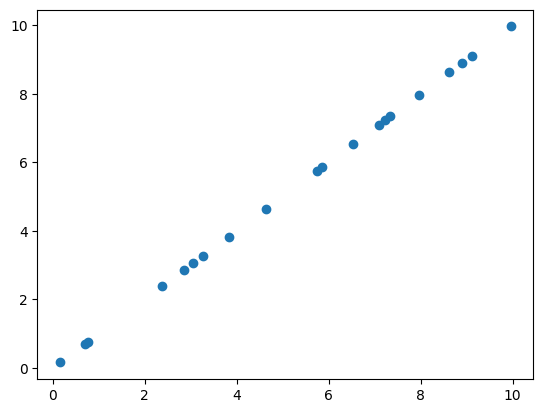

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
data = np.random.rand(20)*10
plt.scatter(data,data)

It looks like the two neuros are firing exactly in sync! If we write out or data in the standard basis, it's going to look something like
\begin{align}
\left[\begin{matrix} 1.2 \\ 1.2 \end{matrix}\right],\left[\begin{matrix} 4.3 \\ 4.3 \end{matrix}\right], \left[\begin{matrix} 8.9 \\ 8.9 \end{matrix}\right], \cdots
\end{align}
It seems kind of silly to keep writing out both of these numbers. In an important sense, our data aren't really two-dimensional—they are essentially one-dimensional. If we know the activity of one of the two neurons, we already know the activity of the other.

Is there a way we can encode this insight? Yes! We can switch to a cleverly chosen basis—in this case, $\left(\left[\begin{matrix} 1 \\ 1 \end{matrix}\right],\left[\begin{matrix} 1 \\ -1 \end{matrix}\right]\right)$. In this new basis, our data look a lot simpler:
\begin{align}
\left[\begin{matrix} 1.2 \\ 0 \end{matrix}\right],\left[\begin{matrix} 4.3 \\ 0 \end{matrix}\right], \left[\begin{matrix} 8.9 \\ 0 \end{matrix}\right], \cdots
\end{align}

Now we can essentially ignore the second entry in each vector. By changing our basis, we've made a two-dimenional dataset one-dimensional.